In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn import linear_model
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
import xgboost

In [2]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_0d2d29357c0d49b0b68b0d89a1ced941 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Y6Hiotwu0R6xvBTrs03BbPr-RDy9RfbSs5kEZIjvH1zT',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_0d2d29357c0d49b0b68b0d89a1ced941.get_object(Bucket='rainfallprediction-donotdelete-pr-ztuo7jxzurihog',Key='project.xlsx')['Body']

data = pd.read_excel(body.read())
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
# removing columns with more than 20% missing values and segregatting cat and num variables
data_cat = data[['RainToday','WindGustDir','WindDir9am','WindDir3pm']]
data.drop(columns=['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1,inplace=True)
data.drop(columns=['RainToday','WindGustDir','WindDir9am','WindDir3pm'],axis=1,inplace=True)

In [4]:
# filling the missing data of numeric variables with mean
data['MinTemp'].fillna(data['MinTemp'].mean(),inplace=True)
data['MaxTemp'].fillna(data['MaxTemp'].mean(),inplace=True)
data['Rainfall'].fillna(data['Rainfall'].mean(),inplace=True)
data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean(),inplace=True)
data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean(),inplace=True)
data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean(),inplace=True)
data['Humidity9am'].fillna(data['Humidity9am'].mean(),inplace=True)
data['Humidity3pm'].fillna(data['Humidity3pm'].mean(),inplace=True)
data['Pressure9am'].fillna(data['Pressure9am'].mean(),inplace=True)
data['Pressure3pm'].fillna(data['Pressure3pm'].mean(),inplace=True)
data['Temp9am'].fillna(data['Temp9am'].mean(),inplace=True)
data['Temp3pm'].fillna(data['Temp3pm'].mean(),inplace=True)

In [5]:
# loading the names of categorical columns
cat_names = data_cat.columns

In [6]:
# intializing the simple imputer for missing categorical values
import numpy as np
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [7]:
# fitting and transforming the missing data
data_cat = imp_mode.fit_transform(data_cat)

In [8]:
# converting array to dataframe
data_cat = pd.DataFrame(data_cat,columns=cat_names)

In [9]:
# concatinating the categorical and numeric data
data = pd.concat([data,data_cat],axis=1)

In [10]:
data.shape

(145460, 19)

<AxesSubplot:>

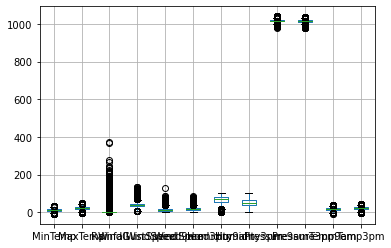

In [11]:
data.boxplot()


In [13]:
#importing the labelencoder
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()

In [15]:
#fitting and transforming the categorical data
data['Location'] = le.fit_transform(data['Location'])
data['RainToday'] = le.fit_transform(data['RainToday'])
data['WindGustDir'] = le.fit_transform(data['WindGustDir'])
data['WindDir9am'] = le.fit_transform(data['WindDir9am'])
data['WindDir3pm'] = le.fit_transform(data['WindDir3pm'])

In [16]:
data['Date'].unique()

array(['2008-12-01T00:00:00.000000000', '2008-12-02T00:00:00.000000000',
       '2008-12-03T00:00:00.000000000', ...,
       '2008-01-29T00:00:00.000000000', '2008-01-30T00:00:00.000000000',
       '2008-01-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [17]:
# removing the main column
data.drop(['Date'],axis=1,inplace=True)

In [18]:
data.dropna(axis=0,how='any',inplace=True)

In [19]:
data.shape

(142193, 18)

In [21]:
from sklearn.preprocessing import StandardScaler

In [24]:
names = x.columns

In [25]:
sc = StandardScaler()

In [23]:
y = data['RainTomorrow']
x = data.drop('RainTomorrow',axis=1)

In [26]:
x = sc.fit_transform(x)

In [27]:
x = pd.DataFrame(x,columns=names)

In [28]:
from sklearn import model_selection

In [29]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size =0.2,random_state =0)

In [30]:
x_train.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'WindGustDir', 'WindDir9am', 'WindDir3pm'],
      dtype='object')

In [31]:
import sklearn

In [32]:
#Models intilization of the models
XGBoost = xgboost.XGBRFClassifier()
Rand_forest = sklearn.ensemble.RandomForestClassifier()
svm = sklearn.svm.SVC()
Dtree = sklearn.tree.DecisionTreeClassifier()
GBM = sklearn.ensemble.GradientBoostingClassifier()
log = sklearn.linear_model.LogisticRegression()

In [33]:
# fitting the model
XGBoost.fit(x_train,y_train)
Rand_forest.fit(x_train,y_train)
svm.fit(x_train,y_train)
Dtree.fit(x_train,y_train)
GBM.fit(x_train,y_train)
log.fit(x_train,y_train)

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:46:08] WARNING: /opt/conda/conda-bld/xgboost-base_1637056499199/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


LogisticRegression()

In [34]:
# predicting the unknown values
p1 = XGBoost.predict(x_train)
p2 = Rand_forest.predict(x_train)
p3 = svm.predict(x_train)
p4 = Dtree.predict(x_train)
p5 = GBM.predict(x_train)
p6 = log.predict(x_train)

In [35]:
#checking the accuraccy score
print("xgboost:",metrics.accuracy_score(y_train,p1))
print("Rand_forest:",metrics.accuracy_score(y_train,p2))
print("svm:",metrics.accuracy_score(y_train,p3))
print("Dtree:",metrics.accuracy_score(y_train,p4))
print("GBM:",metrics.accuracy_score(y_train,p5))
print("log:",metrics.accuracy_score(y_train,p6))

xgboost: 0.8425989415756808
Rand_forest: 0.9999472546020359
svm: 0.8550116918965487
Dtree: 0.9999648364013574
GBM: 0.849148161822881
log: 0.8384056824375407


In [36]:
# predicting the test unknown values
t1 = XGBoost.predict(x_test)
t2 = Rand_forest.predict(x_test)
t3 = svm.predict(x_test)
t4 = Dtree.predict(x_test)
t5 = GBM.predict(x_test)
t6 = log.predict(x_test)

In [37]:
print("xgboost:",metrics.accuracy_score(y_test,t1))
print("Rand_forest:",metrics.accuracy_score(y_test,t2))
print("svm:",metrics.accuracy_score(y_test,t3))
print("Dtree:",metrics.accuracy_score(y_test,t4))
print("GBM:",metrics.accuracy_score(y_test,t5))
print("log:",metrics.accuracy_score(y_test,t6))

xgboost: 0.8426104996659517
Rand_forest: 0.8568515067337108
svm: 0.8518935264953057
Dtree: 0.7769612152326031
GBM: 0.8505924962199796
log: 0.8420478919793242


In [38]:
model = ensemble.RandomForestClassifier(criterion='entropy',max_features='sqrt',n_estimators = 25)

In [39]:
model.fit(x_train,y_train)
y_tp= model.predict(x_train)
sklearn.metrics.accuracy_score(y_train,y_tp)

0.9983824744624364

In [40]:
metrics.confusion_matrix(y_train,y_tp)

array([[88230,    19],
       [  165, 25340]])

In [41]:
y_pred= model.predict(x_test)
sklearn.metrics.accuracy_score(y_test,y_pred)

0.8532297197510461

In [42]:
import ibm_watson_machine_learning

In [43]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

In [56]:
wml_credentials = {
    "apikey" : "9417L-N8ej71KwqkN_GQdwUO5hFeBAOJO0FasObjrJ_t",
    "url" : "https://us-south.ml.cloud.ibm.com"
}

In [45]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -------------------  ------------------------
ID                                    NAME                 CREATED
c403925f-55b5-42a7-a5f8-b966abc486c8  rainfall_prediction  2022-03-05T09:44:21.021Z
------------------------------------  -------------------  ------------------------


In [46]:
SPACE_ID = "c403925f-55b5-42a7-a5f8-b966abc486c8"

In [47]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [58]:
MODEL_NAME = "rainfall prediction"
DEPLOYMENT_NAME = "rainfall_prediction"
BEST_MODEL = model

In [59]:
software_spec_uid = wml_client.software_specifications.get_id_by_name("default_py3.8")

model_props = {
    wml_client.repository.ModelMetaNames.NAME:MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE:'scikit-learn_0.23',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID : software_spec_uid
}

In [60]:
model_details = wml_client.repository.store_model(
    model = BEST_MODEL,
    meta_props = model_props,
    training_data = x_train,
    training_target = y_train
)

In [61]:
software_spec_uid 

'ab9e1b80-f2ce-592c-a7d2-4f2344f77194'

In [62]:
model_uid = wml_client.repository.get_model_id(model_details)

In [63]:
model_uid

'210db845-42ca-4638-8cda-a18a4afdc0c8'

In [64]:
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE:{}
}

In [65]:
deployment = wml_client.deployments.create(artifact_uid=model_uid,meta_props=deployment_props)



#######################################################################################

Synchronous deployment creation for uid: '210db845-42ca-4638-8cda-a18a4afdc0c8' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='31b8a4af-295b-4f63-8af1-935bf55cd75b'
------------------------------------------------------------------------------------------------




In [68]:
deployment_uid = wml_client.deployments.get_uid(deployment)
deployment_uid

'31b8a4af-295b-4f63-8af1-935bf55cd75b'

In [73]:
payload= {"input data":[{"field":x_test.columns.to_numpy().tolist(),"values":x_test.to_numpy().tolist()}]}